Kabupaten Probolinggo dan Sekitarnya; mengulik data PDRB menggunakann Jupyter Notebook

Untuk menilai performa ekonomi suatu daerah, Produk Domestik Regional Bruto (PDRB) bisa menjadi acuan. Data PDRB juga memungkinkan kita untuk melihat keragaman struktur ekonomi suatu daerah. 

Kita akan memanfaatkan data PDRB atas harga konstan 2010 yang bersumber dari Badan Pusat Statistik (BPS). penggunaan harga konstan 2010 memastikan bahwa perhitungan tidak terdistorsi oleh inflasi, sehingga memberikan gambaran riil dinamika ekonomi dari tahun ke tahun. Data yang digunakan mencakup periode 2013-2024 dan meliputi seluruh Kabupaten dan Kota di Jawa Timur.

Telaah ini akan menggunakan Jupyter Notebook.


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = r'D:\git\pdrb\data\PDRB Harga Konstan 2010 Per Kab Jatim1.xlsx'

df_fixed = pd.read_excel(file_path, skiprows=1)
df_fixed.columns = ["Kabupaten/Kota"] + list(range(2015, 2025))
df_fixed = df_fixed.dropna(subset=["Kabupaten/Kota"])
df_fixed.head()

,Kabupaten/Kota,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Pacitan,9019.54,9489.69,9962.50,10507.37,11040.77,10837.87,11107.40,11722.44,12244.97,12775.8
1,Ponorogo,11687.87,12305.65,12933.45,13615.23,14297.10,14168.62,14619.97,15093.71,15870.05,16622.8
2,Trenggalek,10501.58,11026.55,11579.86,12161.86,12779.45,12502.39,12959.02,13545.41,14212.06,14881.6
3,Tulungagung,22326.63,23446.44,24637.36,25920.20,27299.80,26455.76,27390.42,28818.91,30234.61,31703.9
4,Blitar,20928.47,21991.43,23107.48,24286.24,25530.11,24945.46,25700.02,27037.33,28239.86,29493.8


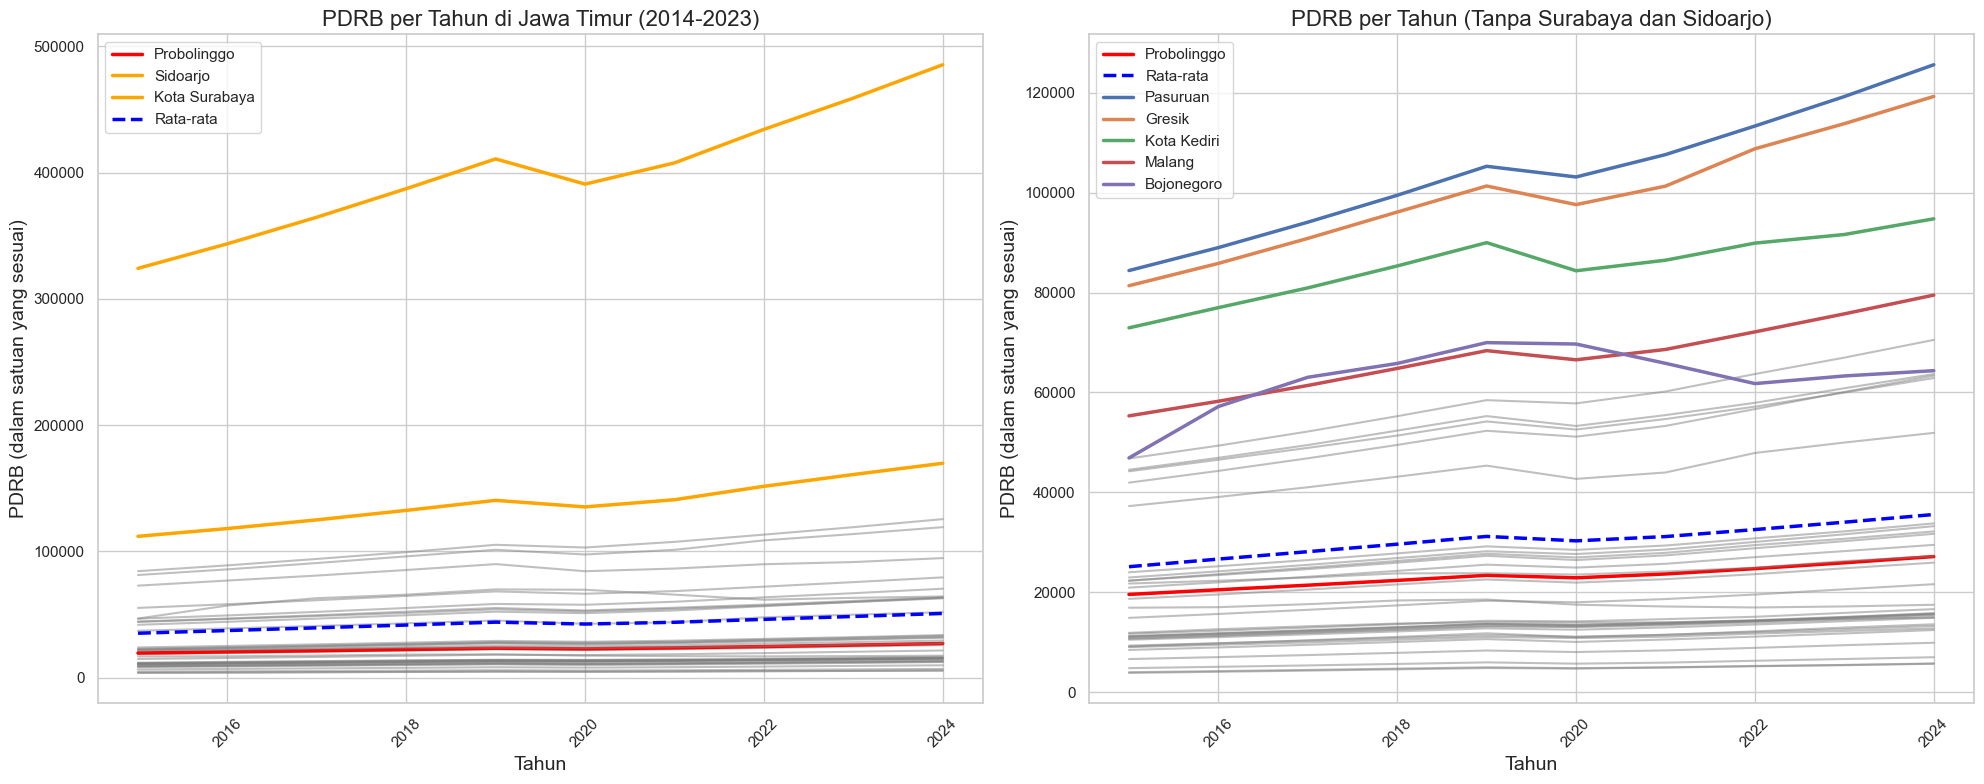

In [57]:
sns.set(style="whitegrid")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

def calculate_mean_without_outliers(data):
    return data[~data["Kabupaten/Kota"].isin(["Kota Surabaya", "Sidoarjo"])].iloc[:, 1:].mean()

def create_plot(ax, data, title, highlight_outliers=False, highlight_top_4=False):
    if not highlight_outliers:
        data = data[~data["Kabupaten/Kota"].isin(["Kota Surabaya", "Sidoarjo"])]

    for idx, row in data.iterrows():
        if row["Kabupaten/Kota"] == "Probolinggo":
            ax.plot(row.index[1:], row.values[1:], color='red', linewidth=2.5, label='Probolinggo')
        elif highlight_outliers and row["Kabupaten/Kota"] in ["Kota Surabaya", "Sidoarjo"]:
            ax.plot(row.index[1:], row.values[1:], color='orange', linewidth=2.5, label=row["Kabupaten/Kota"])
        else:
            ax.plot(row.index[1:], row.values[1:], color='grey', alpha=0.5)

    if highlight_outliers:
        mean_values = data.iloc[:, 1:].mean()
    else:
        mean_values = calculate_mean_without_outliers(data)
    ax.plot(mean_values.index, mean_values.values, color='blue', linestyle='--', linewidth=2.5, label='Rata-rata')

    if highlight_top_4:
        top_4 = data.set_index("Kabupaten/Kota").mean(axis=1).nlargest(5).index
        for kabupaten in top_4:
            row = data[data["Kabupaten/Kota"] == kabupaten].iloc[0]
            ax.plot(row.index[1:], row.values[1:], linewidth=2.5, label=kabupaten)

    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tahun', fontsize=14)
    ax.set_ylabel('PDRB (dalam satuan yang sesuai)', fontsize=14)
    ax.tick_params(axis='x', rotation=45)
    ax.legend()

create_plot(ax1, df_fixed, 'PDRB per Tahun di Jawa Timur (2014-2023)', highlight_outliers=True)
create_plot(ax2, df_fixed, 'PDRB per Tahun (Tanpa Surabaya dan Sidoarjo)', highlight_top_4=True)

plt.tight_layout()
plt.show()

In [58]:
df_fixed['Pertumbuhan'] = ((df_fixed[2024] - df_fixed[2015]) / df_fixed[2015]) * 100
df_pertumbuhan = df_fixed.sort_values(by='Pertumbuhan', ascending=False)

print("5 Kabupaten/Kota dengan Pertumbuhan Tertinggi:")
print(df_pertumbuhan[['Kabupaten/Kota', 'Pertumbuhan']].head(5))
print("\n5 Kabupaten/Kota dengan Pertumbuhan Terendah:")
print(df_pertumbuhan[['Kabupaten/Kota', 'Pertumbuhan']].tail(5))

5 Kabupaten/Kota dengan Pertumbuhan Tertinggi:
      Kabupaten/Kota  Pertumbuhan
14          Sidoarjo    51.650266
31       Kota Malang    51.060983
15         Mojokerto    50.724916
36     Kota Surabaya    49.730471
32  Kota Probolinggo    49.248125

5 Kabupaten/Kota dengan Pertumbuhan Terendah:
   Kabupaten/Kota  Pertumbuhan
21     Bojonegoro    37.264967
29    Kota Kediri    29.924479
26        Sampang    25.692241
28        Sumenep    25.212293
25      Bangkalan     3.493616


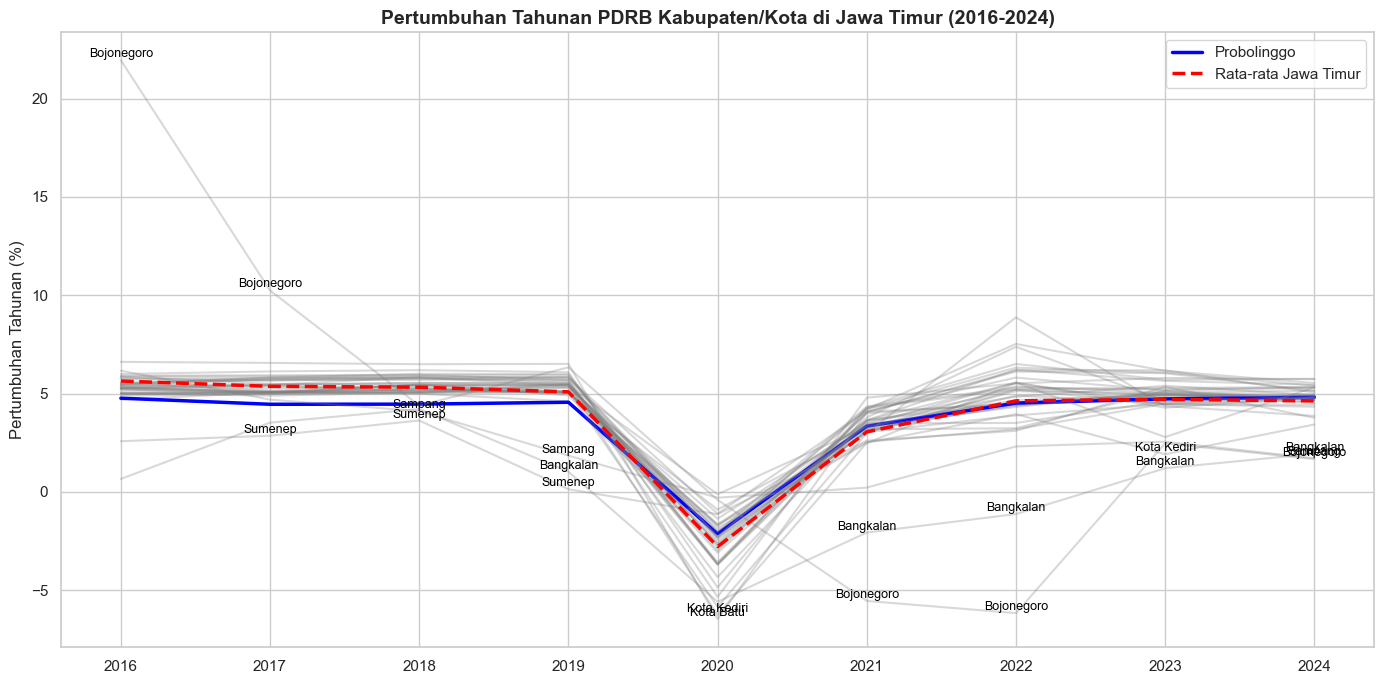

In [59]:
df_pertumbuhan_tahunan = pd.DataFrame({'Kabupaten/Kota': df_fixed['Kabupaten/Kota']})
year_cols = list(range(2016, 2025))
for year in year_cols:
    prev_year = year - 1
    df_pertumbuhan_tahunan[year] = ((df_fixed[year] - df_fixed[prev_year]) / df_fixed[prev_year]) * 100

df_pertumbuhan_tahunan['Avg_Growth'] = df_pertumbuhan_tahunan[year_cols].mean(axis=1)
mean_growth_by_year = {}
std_growth_by_year = {}

for year in year_cols:
    mean_growth_by_year[year] = df_pertumbuhan_tahunan[year].mean()
    std_growth_by_year[year] = df_pertumbuhan_tahunan[year].std()

outlier_kabupaten = []
for idx, row in df_pertumbuhan_tahunan.iterrows():
    kabupaten = row['Kabupaten/Kota']
    is_outlier = False
    
    for year in year_cols:
        growth = row[year]
        if (growth > (mean_growth_by_year[year] + 2 * std_growth_by_year[year]) or 
            growth < (mean_growth_by_year[year] - 2 * std_growth_by_year[year])):
            is_outlier = True
            break
    
    if is_outlier and kabupaten not in outlier_kabupaten:
        outlier_kabupaten.append(kabupaten)

plt.figure(figsize=(14, 7))
for idx, row in df_pertumbuhan_tahunan.iterrows():
    kabupaten = row['Kabupaten/Kota']
    if kabupaten == 'Probolinggo':
        plt.plot(year_cols, row[year_cols], color='blue', linewidth=2.5, label='Probolinggo')
    else:
        plt.plot(year_cols, row[year_cols], color='gray', alpha=0.3)

mean_values = [mean_growth_by_year[year] for year in year_cols]
plt.plot(year_cols, mean_values, color='red', linestyle='--', linewidth=2.5, label='Rata-rata Jawa Timur')

for idx, row in df_pertumbuhan_tahunan.iterrows():
    kabupaten = row['Kabupaten/Kota']
    if kabupaten in outlier_kabupaten:
        for year in year_cols:
            growth = row[year]
            if (growth > (mean_growth_by_year[year] + 2 * std_growth_by_year[year]) or 
                growth < (mean_growth_by_year[year] - 2 * std_growth_by_year[year])):
                plt.text(year, growth, kabupaten, fontsize=9, color='black', ha='center', va='bottom')

plt.title("Pertumbuhan Tahunan PDRB Kabupaten/Kota di Jawa Timur (2016-2024)", 
          fontsize=14, fontweight='bold')
plt.ylabel("Pertumbuhan Tahunan (%)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [60]:
file = r'D:\git\pdrb\data\PDRB Harga Konstan 2010 Per Lapangan Usaha Kabupaten Probolinggo.xlsx'

df_sektor = pd.read_excel(file)

df_sektor['Lapangan Usaha'] = df_sektor['Lapangan Usaha'].str.replace('\n', ' ') 
df_sektor['Lapangan Usaha'] = df_sektor['Lapangan Usaha'].str.split('/').str[0] 

print(df_sektor.head())

                         Lapangan Usaha     2015     2016     2017     2018  \
0   Pertanian, Kehutanan, dan Perikanan  7145.07  7358.51  7350.29  7200.14   
1                          Pertambangan   492.95   502.97   522.89   534.97   
2        Industri Pengolahan;Manufaktur  4324.06  4575.88  4940.82  5446.22   
3             Pengadaan Listrik dan Gas   193.82   201.36   210.73   221.04   
4  Penyedian Air dan Pengelolaan Sampah    22.70    23.87    25.21    26.21   

      2019     2020     2021     2022     2023     2024  
0  7278.30  7280.05  7355.14  7510.66  7760.63  7883.57  
1   533.47   493.40   493.32   508.40   551.55   586.55  
2  5887.62  5820.76  6195.45  6525.66  6890.04  7383.31  
3   232.49   234.17   238.50   252.72   264.69   280.12  
4    27.26    28.14    28.42    28.54    29.40    28.29  


Sektor Unggulan Kabupaten Probolinggo (Tahun 2024):
                        Lapangan Usaha  Kontribusi_Probolinggo  \
0  Pertanian, Kehutanan, dan Perikanan               29.033797   
2       Industri Pengolahan;Manufaktur               27.191427   
5                           Konstruksi                7.825705   
6                 Perdagangan & Retail               13.092069   

   Pertumbuhan_Probolinggo  
0                 9.491899  
2                35.567605  
5                21.389317  
6                21.373212  


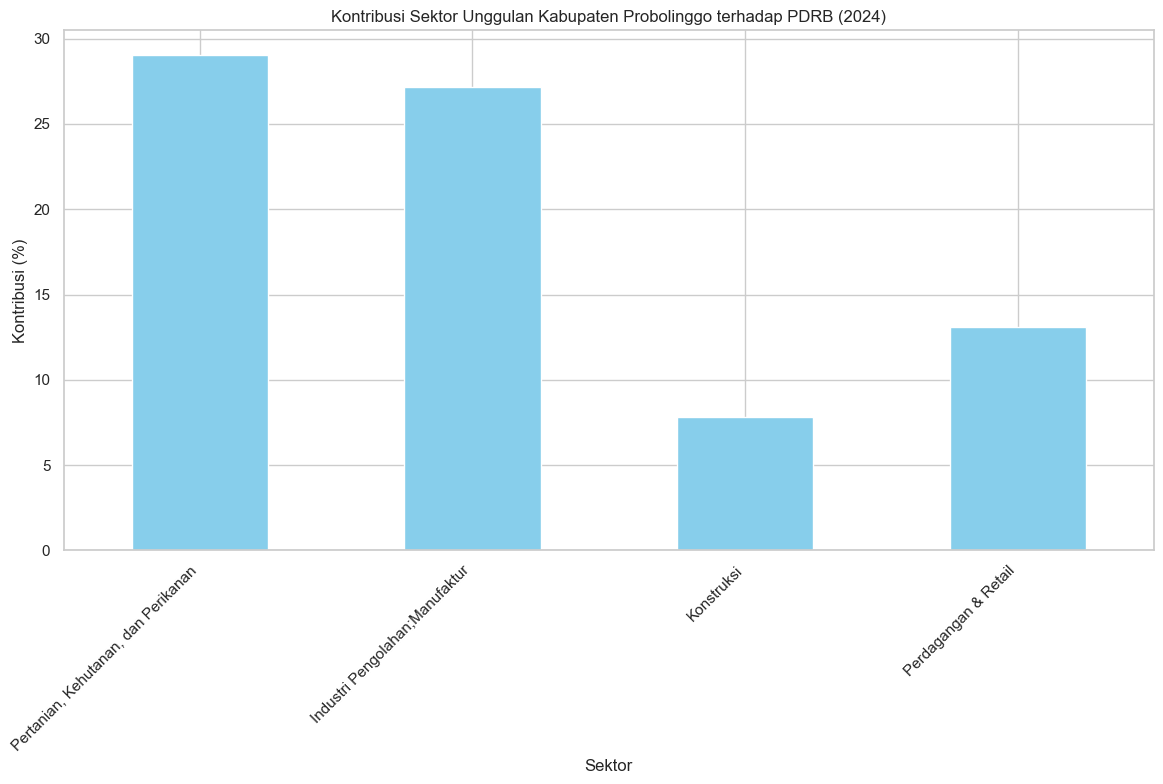

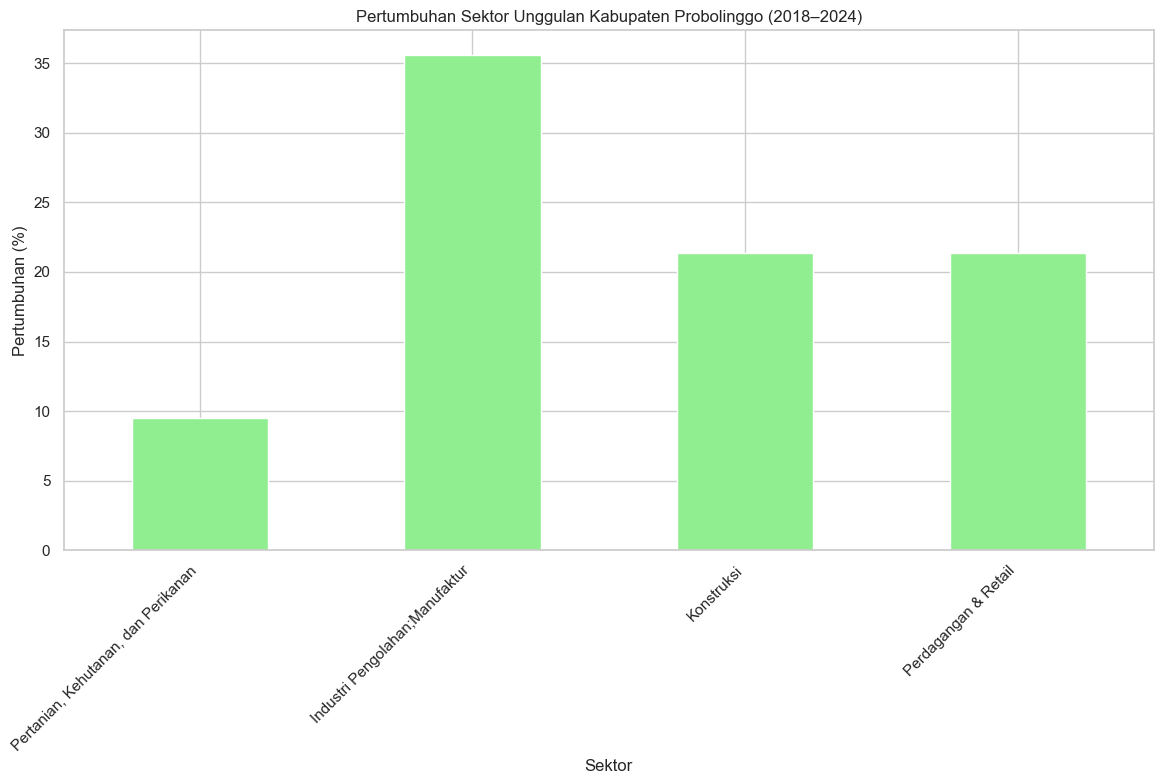

In [61]:
df_probolinggo = df_sektor.copy()
df_jatim = df_sektor.copy()

df_jatim['Lapangan Usaha'] = df_jatim['Lapangan Usaha'].str.split('\n').str[0]
df_jatim = df_jatim[~df_jatim['Lapangan Usaha'].str.startswith(('1', '2', '3', 'a.', 'b.', 'c.', 'd.', 'e.'))]

df_probolinggo.columns = df_probolinggo.columns.astype(str)
df_jatim.columns = df_jatim.columns.astype(str)

tahun = ['2018', '2019', '2020', '2021', '2022', '2023', '2024']
df_probolinggo = df_probolinggo[['Lapangan Usaha'] + tahun]
df_jatim = df_jatim[['Lapangan Usaha'] + tahun]

# --- ANALISIS SEKTOR UNGGULAN ---
df_combined = pd.merge(df_probolinggo, df_jatim, on='Lapangan Usaha', suffixes=('_Probolinggo', '_Jatim'))

df_combined['Kontribusi_Probolinggo'] = df_combined['2024_Probolinggo'] / df_combined['2024_Probolinggo'].sum() * 100
df_combined['Kontribusi_Jatim'] = df_combined['2024_Jatim'] / df_combined['2024_Jatim'].sum() * 100

df_combined['Pertumbuhan_Probolinggo'] = (df_combined['2024_Probolinggo'] - df_combined['2018_Probolinggo']) / df_combined['2018_Probolinggo'] * 100

# Identifikasi sektor unggulan: kontribusi > 5% dan pertumbuhan positif
df_unggulan = df_combined[(df_combined['Kontribusi_Probolinggo'] > 5) & (df_combined['Pertumbuhan_Probolinggo'] > 0)]

print("Sektor Unggulan Kabupaten Probolinggo (Tahun 2024):")
print(df_unggulan[['Lapangan Usaha', 'Kontribusi_Probolinggo', 'Pertumbuhan_Probolinggo']])

# --- VISUALISASI ---

# Kontribusi sektor unggulan tahun 2024
plt.figure(figsize=(12, 8))
df_unggulan.set_index('Lapangan Usaha')['Kontribusi_Probolinggo'].plot(kind='bar', color='skyblue')
plt.title('Kontribusi Sektor Unggulan Kabupaten Probolinggo terhadap PDRB (2024)')
plt.xlabel('Sektor')
plt.ylabel('Kontribusi (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Pertumbuhan sektor 2018–2024
plt.figure(figsize=(12, 8))
df_unggulan.set_index('Lapangan Usaha')['Pertumbuhan_Probolinggo'].plot(kind='bar', color='lightgreen')
plt.title('Pertumbuhan Sektor Unggulan Kabupaten Probolinggo (2018–2024)')
plt.xlabel('Sektor')
plt.ylabel('Pertumbuhan (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

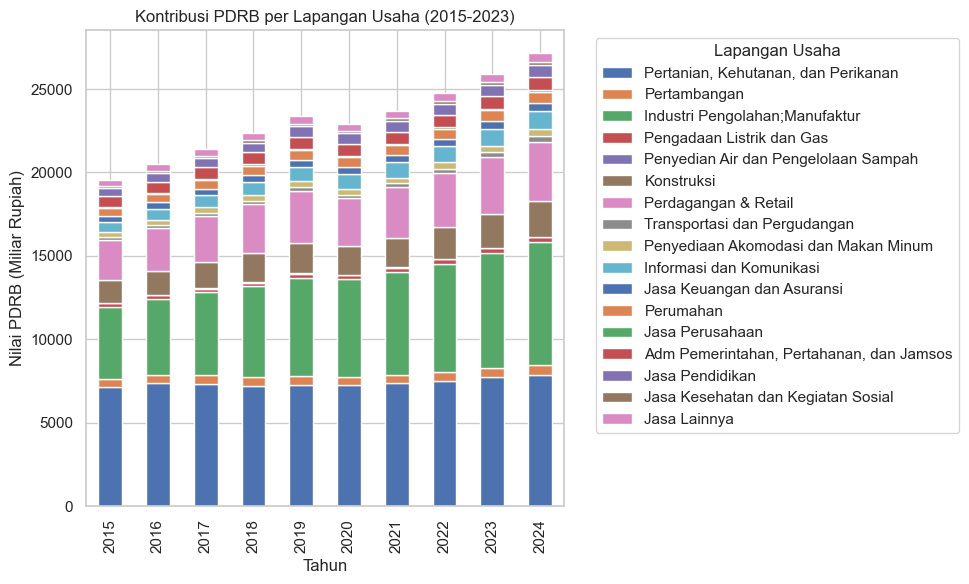

In [52]:
df_sektor.set_index('Lapangan Usaha').T.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Kontribusi PDRB per Lapangan Usaha (2015-2023)')
plt.xlabel('Tahun')
plt.ylabel('Nilai PDRB (Miliar Rupiah)')
plt.legend(title='Lapangan Usaha', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

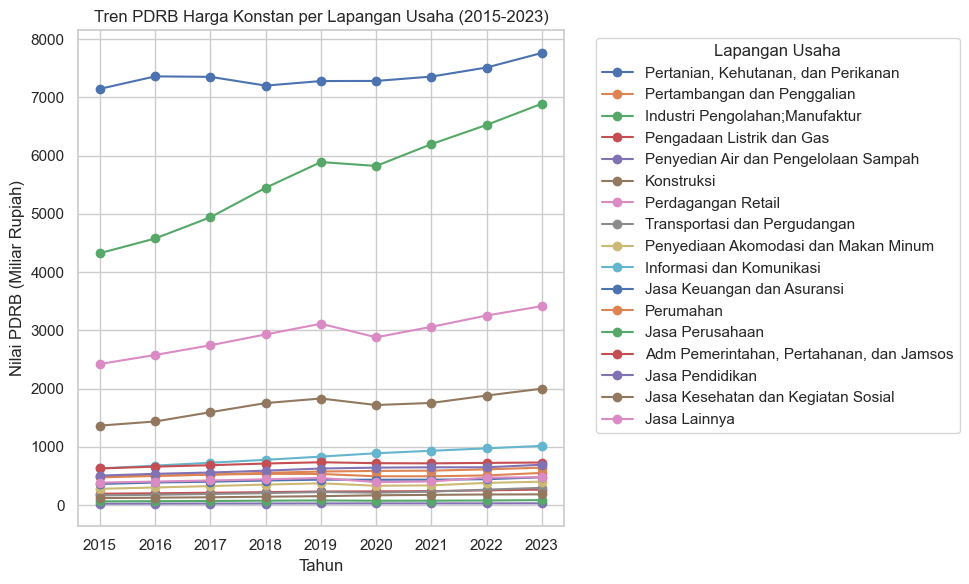

In [ ]:
plt.figure(figsize=(10, 6))
for index, row in df_sektor.iterrows():
    plt.plot(df_sektor.columns[1:], row[1:], marker='o', label=row['Lapangan Usaha'])
plt.title('Tren PDRB Harga Konstan per Lapangan Usaha (2015-2023)')
plt.xlabel('Tahun') 
plt.ylabel('Nilai PDRB (Miliar Rupiah)')
plt.legend(title='Lapangan Usaha', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

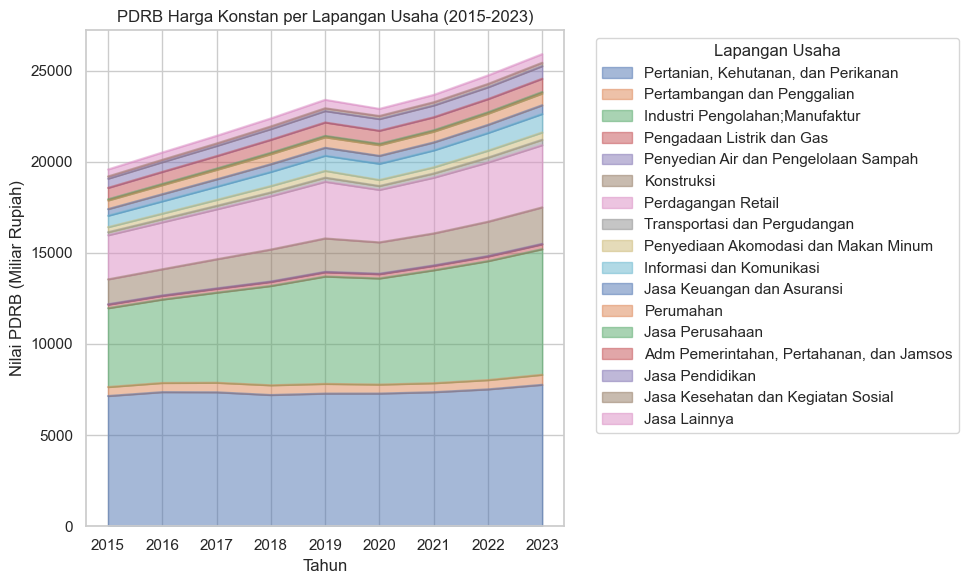

In [ ]:
df_sektor.set_index('Lapangan Usaha').T.plot(kind='area', figsize=(10, 6), alpha=0.5)
plt.title('PDRB Harga Konstan per Lapangan Usaha (2015-2023)')
plt.xlabel('Tahun')
plt.ylabel('Nilai PDRB (Miliar Rupiah)')
plt.legend(title='Lapangan Usaha', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

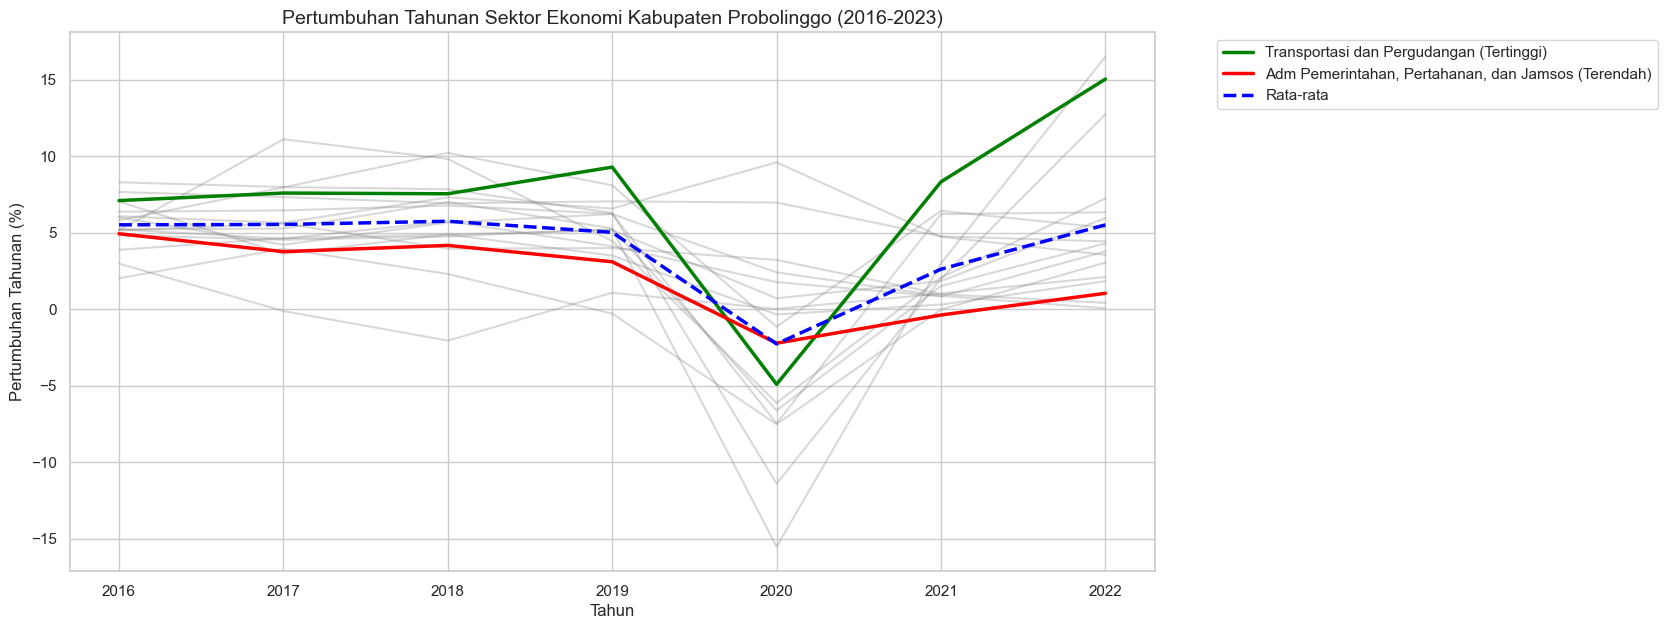

In [ ]:
df_pertumbuhan = df_sektor.iloc[:, 1:-1].pct_change(axis='columns') * 100  # Kolom tahun sebagai integer

df_pertumbuhan = df_sektor.iloc[:, 1:-1].pct_change(axis='columns') * 100  # Kolom tahun sebagai integer

df_pertumbuhan['Lapangan Usaha'] = df_sektor['Lapangan Usaha']

df_sektor['Pertumbuhan 2023 (%)'] = ((df_sektor[2023] - df_sektor[2022]) / df_sektor[2022]) * 100

plt.figure(figsize=(14, 7))
for sektor in df_pertumbuhan['Lapangan Usaha']:
    plt.plot(df_pertumbuhan.columns[:-1], df_pertumbuhan[df_pertumbuhan['Lapangan Usaha'] == sektor].iloc[:, :-1].values.flatten(), color='gray', alpha=0.3)
sektor_tertinggi = df_sektor.sort_values(by='Pertumbuhan 2023 (%)', ascending=False).iloc[0]['Lapangan Usaha']
pertumbuhan_tertinggi = df_pertumbuhan[df_pertumbuhan['Lapangan Usaha'] == sektor_tertinggi].iloc[:, :-1].values.flatten()
plt.plot(df_pertumbuhan.columns[:-1], pertumbuhan_tertinggi, color='green', linewidth=2.5, label=f'{sektor_tertinggi} (Tertinggi)')

sektor_terendah = df_sektor.sort_values(by='Pertumbuhan 2023 (%)').iloc[0]['Lapangan Usaha']
pertumbuhan_terendah = df_pertumbuhan[df_pertumbuhan['Lapangan Usaha'] == sektor_terendah].iloc[:, :-1].values.flatten()
plt.plot(df_pertumbuhan.columns[:-1], pertumbuhan_terendah, color='red', linewidth=2.5, label=f'{sektor_terendah} (Terendah)')

rata_rata_pertumbuhan = df_pertumbuhan.iloc[:, :-1].mean()
plt.plot(df_pertumbuhan.columns[:-1], rata_rata_pertumbuhan, color='blue', linestyle='--', linewidth=2.5, label='Rata-rata')

plt.title("Pertumbuhan Tahunan Sektor Ekonomi Kabupaten Probolinggo (2016-2023)", fontsize=14)
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Pertumbuhan Tahunan (%)", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()